In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words = 10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [4]:
len(train_data)

8982

In [6]:
len(test_data)

2246

In [8]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [9]:
word_index =reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [11]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [10]:
train_labels[10]

3

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimesion=10000):
    results = np.zeros((len(sequences), dimesion))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 162us/step - loss: 2.5905 - accuracy: 0.5103 - val_loss: 1.7177 - val_accuracy: 0.6580
Epoch 2/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.4009 - accuracy: 0.7139 - val_loss: 1.2812 - val_accuracy: 0.7250
Epoch 3/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.0290 - accuracy: 0.7816 - val_loss: 1.1318 - val_accuracy: 0.7450
Epoch 4/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.8093 - accuracy: 0.8280 - val_loss: 1.0303 - val_accuracy: 0.7870
Epoch 5/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.6518 - accuracy: 0.8653 - val_loss: 0.9803 - val_accuracy: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.5238 - accuracy: 0.8938 - val_loss: 0.9238 - val_accuracy: 0.8140
Epoch 7/20
7982/7982 [==============================] - 1s 123us/step - loss

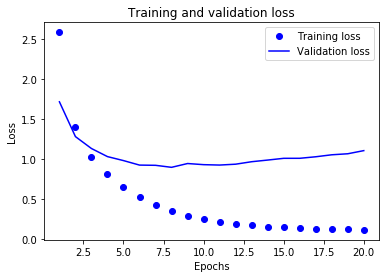

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

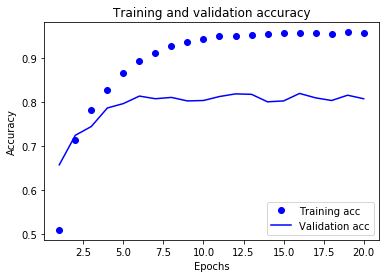

In [26]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 129us/step - loss: 2.7035 - accuracy: 0.5219 - val_loss: 1.7463 - val_accuracy: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s 117us/step - loss: 1.4044 - accuracy: 0.7192 - val_loss: 1.2779 - val_accuracy: 0.7250
Epoch 3/9
7982/7982 [==============================] - 1s 119us/step - loss: 1.0132 - accuracy: 0.7884 - val_loss: 1.1006 - val_accuracy: 0.7700
Epoch 4/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.7939 - accuracy: 0.8325 - val_loss: 1.0055 - val_accuracy: 0.7860
Epoch 5/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.6348 - accuracy: 0.8697 - val_loss: 0.9623 - val_accuracy: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.5077 - accuracy: 0.8951 - val_loss: 0.9162 - val_accuracy: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.411

AttributeError: 'Sequential' object has no attribute 'evalute'

In [28]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 153us/step


In [29]:
print(results)

[0.9892690553266028, 0.7885128855705261]


In [30]:
predictions = model.predict(x_test)

In [33]:
print(predictions)
print(len(predictions))
print(predictions.shape)

[[2.69680913e-05 1.57363422e-04 1.84760920e-05 ... 2.18285029e-04
  1.31559755e-05 1.73609878e-05]
 [5.88277448e-03 1.58359870e-01 8.55020061e-02 ... 3.70047404e-04
  5.24907409e-06 4.78110509e-04]
 [8.02855566e-03 6.70320749e-01 2.67994124e-02 ... 1.45949156e-03
  1.77449430e-04 9.03633365e-04]
 ...
 [3.53360920e-05 5.03979332e-04 5.06563592e-05 ... 9.20260354e-05
  2.14686210e-04 1.28851723e-04]
 [1.42127287e-03 2.29346063e-02 9.74178966e-03 ... 8.97584017e-04
  3.59963393e-04 1.14581035e-03]
 [2.46603135e-03 6.95757568e-01 3.85094061e-02 ... 4.04340768e-04
  3.24585199e-05 2.16537417e-04]]
2246
(2246, 46)


In [ ]:
num_validation_samples = 10000

np.random.shuffle(data)

validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

training_data = data[:]

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)